# MP1 : Image Classification and Regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">

<ul class="toc-item"><li><span><a href="#Simple-Classification" data-toc-modified-id="Simple-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple Classification</a>
<li><span><a href="#Visualization-of-the-Solution" data-toc-modified-id="Visualization-of-the-Solution"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization of the Solution</a>
<li><span><a href="#A-More-Difficult-Classification-Problem" data-toc-modified-id="A-More-Difficult-Classification-Problem"><span class="toc-item-num">3&nbsp;&nbsp;</span>A More Difficult Classification Problem</a>
<li><span><a href="#A-Regression-Problem" data-toc-modified-id="A-Regression-Problem"><span class="toc-item-num">4&nbsp;&nbsp;</span>A Regression Problem</a>
<li><span><a href="#Image-Denoising" data-toc-modified-id="Image-Denoising"><span class="toc-item-num">5&nbsp;&nbsp;</span>Image Denoising</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mp1
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Conv3D, advanced_activations, UpSampling2D
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


# Simple Classification

Generating Training Set and Test Set

In [2]:
[X_train, Y_train] = mp1.generate_dataset_classification(500, 20)
[X_test, Y_test] = mp1.generate_dataset_classification(30,20)

Creating data:
Data Created!
Creating data:
Data Created!


Checking Training Set shapes

In [3]:
print(X_train.shape)
print(Y_train.shape)

(500, 5184)
(500,)


Visualization of the Training Set

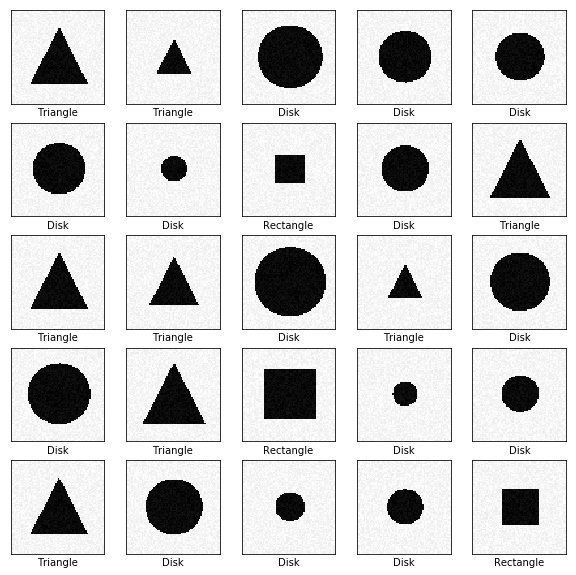

In [4]:
class_names = ['Rectangle', 'Disk', 'Triangle']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(mp1.IMAGE_SIZE,mp1.IMAGE_SIZE), cmap='gray')
    plt.xlabel(class_names[int(Y_train[i])])

Implementation of the Classification Model with Stochastic Gradient Descent optimizer

In [5]:
model_SGD = Sequential()
model_SGD.add(Dense(3, activation='softmax'))
model_SGD.compile(optimizer=SGD(0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_SGD.fit(X_train, Y_train, epochs=32)

Epoch 1/32
500/500 [==============================] - 0s 580us/step - loss: 1.0308 - acc: 0.4500
Epoch 2/32
500/500 [==============================] - 0s 268us/step - loss: 0.9349 - acc: 0.5400
Epoch 3/32
500/500 [==============================] - 0s 285us/step - loss: 0.7890 - acc: 0.7260
Epoch 4/32
500/500 [==============================] - 0s 249us/step - loss: 0.7292 - acc: 0.7680
Epoch 5/32
500/500 [==============================] - 0s 218us/step - loss: 0.6719 - acc: 0.7760
Epoch 6/32
500/500 [==============================] - 0s 222us/step - loss: 0.6276 - acc: 0.7860
Epoch 7/32
500/500 [==============================] - 0s 259us/step - loss: 0.5750 - acc: 0.8420
Epoch 8/32
500/500 [==============================] - 0s 257us/step - loss: 0.5448 - acc: 0.8500
Epoch 9/32
500/500 [==============================] - 0s 264us/step - loss: 0.5243 - acc: 0.8520
Epoch 10/32
500/500 [==============================] - 0s 268us/step - loss: 0.4965 - acc: 0.8760
Epoch 11/32
500/500 [========

Checking performance of the Model with Stochastic Gradient Descent optimizer

In [6]:
metrics_SGD = tuple(model_SGD.evaluate(X_test, Y_test))
print('Metrics with SGD: Loss = %.5f and Accuracy = %.5f' %metrics_SGD)  

30/30 [==============================] - 0s 1ms/step
Metrics with SGD: Loss = 0.40009 and Accuracy = 0.76667


Implementation of the Classification Model with Adam optimizer

In [7]:
model_adam = Sequential()
model_adam.add(Dense(3, activation='softmax'))
model_adam.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_adam.fit(X_train, Y_train, epochs=32)

Epoch 1/32
500/500 [==============================] - 0s 783us/step - loss: 1.6463 - acc: 0.5220
Epoch 2/32
500/500 [==============================] - 0s 270us/step - loss: 0.6902 - acc: 0.7100
Epoch 3/32
500/500 [==============================] - 0s 288us/step - loss: 0.3698 - acc: 0.8660
Epoch 4/32
500/500 [==============================] - 0s 278us/step - loss: 0.2796 - acc: 0.9120
Epoch 5/32
500/500 [==============================] - 0s 290us/step - loss: 0.2391 - acc: 0.9160
Epoch 6/32
500/500 [==============================] - 0s 288us/step - loss: 0.2019 - acc: 0.9320
Epoch 7/32
500/500 [==============================] - 0s 304us/step - loss: 0.1675 - acc: 0.9640
Epoch 8/32
500/500 [==============================] - 0s 281us/step - loss: 0.1463 - acc: 0.9560
Epoch 9/32
500/500 [==============================] - 0s 291us/step - loss: 0.1320 - acc: 0.9880
Epoch 10/32
500/500 [==============================] - 0s 285us/step - loss: 0.1119 - acc: 0.9860
Epoch 11/32
500/500 [========

Checking performance of the Model with Adam optimizer

In [8]:
metrics_adam = tuple(model_adam.evaluate(X_test, Y_test))
print('Metrics with adam: Loss = %.5f and Accuracy = %.5f' %metrics_adam)  

30/30 [==============================] - 0s 2ms/step
Metrics with adam: Loss = 0.03700 and Accuracy = 1.00000


We notice that the model converges faster with Adam Optimizer and we have a way better Accuracy

# Visualization of the Solution

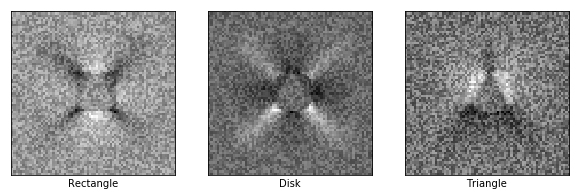

In [9]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(model_adam.get_weights()[0].T[i].reshape(mp1.IMAGE_SIZE,mp1.IMAGE_SIZE), cmap='gray')
    plt.xlabel(class_names[i])

# A More Difficult Classification Problem

Generating Training Set and Test Set

In [10]:
[X_train, Y_train] = mp1.generate_dataset_classification(2000, 20, True)
[X_test, Y_test] = mp1.generate_test_set_classification()

Creating data:
Data Created!
Creating data:
Data Created!


Reshaping the different Data Sets

In [11]:
x_train = np.apply_along_axis(np.reshape, 1, X_train, (mp1.IMAGE_SIZE, mp1.IMAGE_SIZE, 1))
x_test = np.apply_along_axis(np.reshape, 1, X_test, (mp1.IMAGE_SIZE, mp1.IMAGE_SIZE, 1))
y_test = np.apply_along_axis(lambda x: float(np.where(x==1.)[0][0]), 1, Y_test)

Training the First Classification model (with Adam Optimizer) on the new Data Set

In [12]:
model_adam.fit(X_train, Y_train, epochs=32)

Epoch 1/32
2000/2000 [==============================] - 1s 339us/step - loss: 2.1011 - acc: 0.4345
Epoch 2/32
2000/2000 [==============================] - 1s 320us/step - loss: 1.2226 - acc: 0.5130
Epoch 3/32
2000/2000 [==============================] - 1s 321us/step - loss: 1.0328 - acc: 0.5660
Epoch 4/32
2000/2000 [==============================] - 1s 250us/step - loss: 1.0809 - acc: 0.5685
Epoch 5/32
2000/2000 [==============================] - 1s 251us/step - loss: 1.1833 - acc: 0.5485
Epoch 6/32
2000/2000 [==============================] - 1s 269us/step - loss: 0.9429 - acc: 0.5895
Epoch 7/32
2000/2000 [==============================] - 1s 288us/step - loss: 0.8639 - acc: 0.6110
Epoch 8/32
2000/2000 [==============================] - 1s 307us/step - loss: 0.8625 - acc: 0.6025
Epoch 9/32
2000/2000 [==============================] - 1s 289us/step - loss: 0.8092 - acc: 0.6120
Epoch 10/32
2000/2000 [==============================] - 1s 262us/step - loss: 0.8768 - acc: 0.6075
Epoch 11/

In [13]:
metrics_linear_free_location = tuple(model_adam.evaluate(X_test, y_test))
print('Metrics with the First Model on Free Location Data Set: Loss = %.5f and Accuracy = %.5f' %metrics_linear_free_location)  

300/300 [==============================] - 0s 179us/step
Metrics with the First Model on Free Location Data Set: Loss = 1.05833 and Accuracy = 0.61000


Implementation of the Classification Model in the Case of Free Location

In [14]:
model_free_location = Sequential()
model_free_location.add(Conv2D(16, (5, 5), activation='relu',
                        input_shape=(mp1.IMAGE_SIZE, mp1.IMAGE_SIZE, 1)))
model_free_location.add(MaxPooling2D(pool_size=(2, 2)))
model_free_location.add(Flatten())
model_free_location.add(Dense(3, activation='softmax'))
model_free_location.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_free_location.fit(x_train, Y_train, epochs=32)

Epoch 1/32
2000/2000 [==============================] - 27s 13ms/step - loss: 1.0030 - acc: 0.5695
Epoch 2/32
2000/2000 [==============================] - 26s 13ms/step - loss: 0.6411 - acc: 0.7570
Epoch 3/32
2000/2000 [==============================] - 28s 14ms/step - loss: 0.5358 - acc: 0.8100
Epoch 4/32
2000/2000 [==============================] - 27s 13ms/step - loss: 0.4628 - acc: 0.8315
Epoch 5/32
2000/2000 [==============================] - 27s 14ms/step - loss: 0.3931 - acc: 0.8820
Epoch 6/32
2000/2000 [==============================] - 26s 13ms/step - loss: 0.3409 - acc: 0.8910
Epoch 7/32
2000/2000 [==============================] - 28s 14ms/step - loss: 0.2741 - acc: 0.9260
Epoch 8/32
2000/2000 [==============================] - 27s 13ms/step - loss: 0.2357 - acc: 0.9320
Epoch 9/32
2000/2000 [==============================] - 26s 13ms/step - loss: 0.2185 - acc: 0.9440
Epoch 10/32
2000/2000 [==============================] - 26s 13ms/step - loss: 0.1973 - acc: 0.9475
Epoch 11/

Checking performance of the Model

In [15]:
metrics_free_location = tuple(model_free_location.evaluate(x_test, y_test))
print('Metrics For Free Location Model: Loss = %.5f and Accuracy = %.5f' %metrics_free_location)  

300/300 [==============================] - 2s 5ms/step
Metrics For Free Location Model: Loss = 0.19880 and Accuracy = 0.93667


We now have a better Accuracy thanks to the convolutionnal layers

# A Regression Problem

Generating Training Set and Test Set

In [16]:
[X_train, Y_train] = mp1.generate_dataset_regression(300, 20)
[X_test, Y_test] = mp1.generate_test_set_regression()

Creating data:
Data Created!
Creating data:
Data Created!


Reshaping the Training Set

In [17]:
x_train = np.apply_along_axis(np.reshape, 1, X_train, (mp1.IMAGE_SIZE, mp1.IMAGE_SIZE, 1))
y_train = np.apply_along_axis(np.reshape, 1, Y_train, (3,2))
for i, arr in enumerate(y_train):
    y_train[i] = arr[arr[:,0].argsort()]
y_train = np.array([arr.reshape(6) for arr in y_train])

Reshaping the Test Set

In [18]:
x_test = np.apply_along_axis(np.reshape, 1, X_test, (mp1.IMAGE_SIZE, mp1.IMAGE_SIZE, 1))
y_test = np.apply_along_axis(np.reshape, 1, Y_test, (3,2))
for i,arr in enumerate(y_test):
    y_test[i] = arr[arr[:,0].argsort()]
y_test = np.array([arr.reshape(6) for arr in y_test])

Implementation of the Regression Model

In [19]:
model_regression = Sequential()

model_regression.add(Conv2D(16, (5, 5), activation='relu',
                     input_shape=(mp1.IMAGE_SIZE, mp1.IMAGE_SIZE, 1)))
model_regression.add(MaxPooling2D(pool_size=(2, 2)))
model_regression.add(Conv2D(32, (3, 3), activation='relu'))
model_regression.add(MaxPooling2D(pool_size=(2, 2)))
model_regression.add(Conv2D(64, (3, 3), activation='relu'))
model_regression.add(MaxPooling2D(pool_size=(2, 2)))
model_regression.add(Flatten())
model_regression.add(Dense(512, activation='relu'))
model_regression.add(Dropout(0.5))
model_regression.add(Dense(256, activation='relu'))
model_regression.add(Dropout(0.25))
model_regression.add(Dense(128, activation='relu'))
model_regression.add(Dropout(0.1))
model_regression.add(Dense(64, activation='relu'))
model_regression.add(Dense(6))
model_regression.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_regression.fit(x_train, y_train, epochs=32)

Epoch 1/32
300/300 [==============================] - 24s 81ms/step - loss: 0.1870 - mean_absolute_error: 0.3537
Epoch 2/32
300/300 [==============================] - 26s 86ms/step - loss: 0.0920 - mean_absolute_error: 0.2478
Epoch 3/32
300/300 [==============================] - 24s 78ms/step - loss: 0.0764 - mean_absolute_error: 0.2265
Epoch 4/32
300/300 [==============================] - 16s 52ms/step - loss: 0.0665 - mean_absolute_error: 0.2084
Epoch 5/32
300/300 [==============================] - 17s 58ms/step - loss: 0.0585 - mean_absolute_error: 0.1927
Epoch 6/32
300/300 [==============================] - 15s 49ms/step - loss: 0.0559 - mean_absolute_error: 0.1897
Epoch 7/32
300/300 [==============================] - 14s 48ms/step - loss: 0.0527 - mean_absolute_error: 0.1819
Epoch 8/32
300/300 [==============================] - 17s 56ms/step - loss: 0.0445 - mean_absolute_error: 0.1679
Epoch 9/32
300/300 [==============================] - 16s 53ms/step - loss: 0.0444 - mean_absolu

Checking performance of the Model

In [22]:
metrics_regression = tuple(model_regression.evaluate(x_test, y_test))
print('Metrics For Regression Model: MSE = %.5f and MAE = %.5f' %metrics_regression)  

300/300 [==============================] - 5s 16ms/step
Metrics For Regression Model: MSE = 0.01790 and MAE = 0.09891


Visualizing Prediction on Training Set

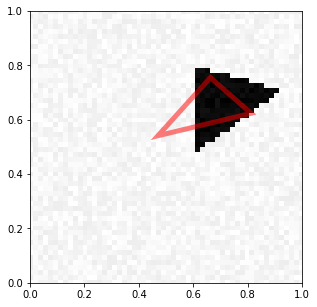

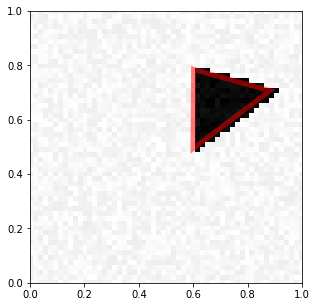

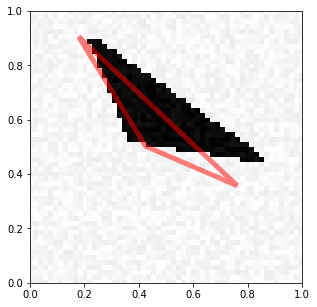

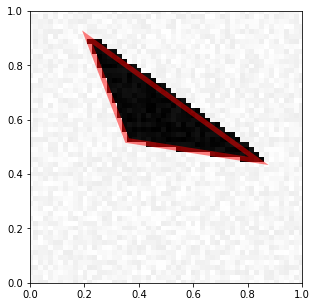

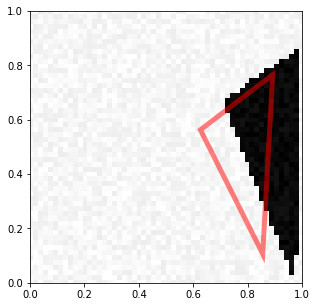

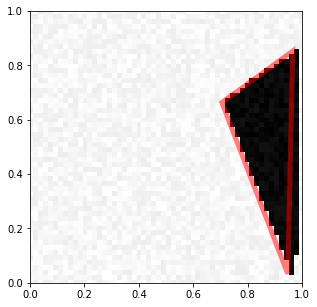

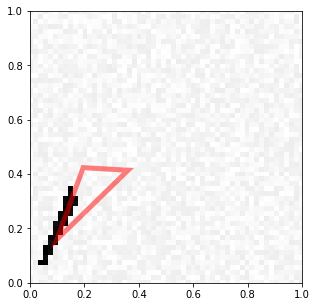

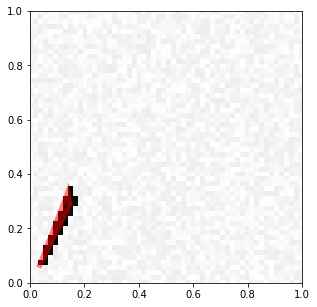

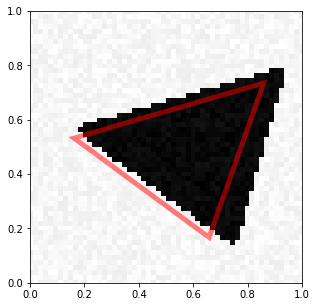

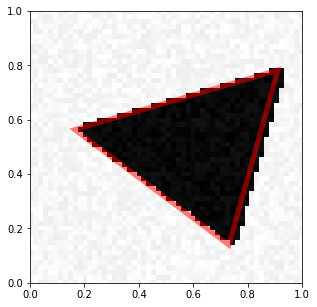

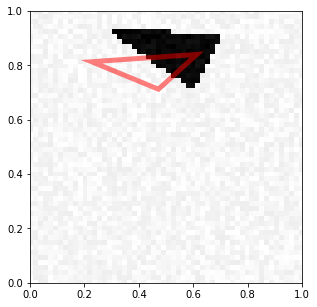

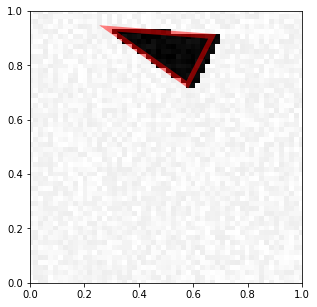

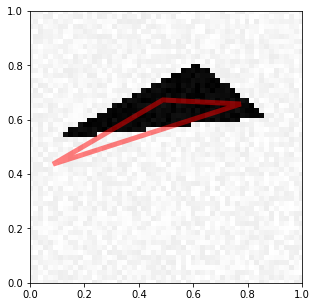

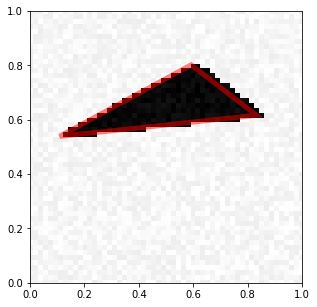

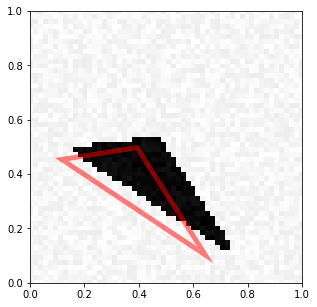

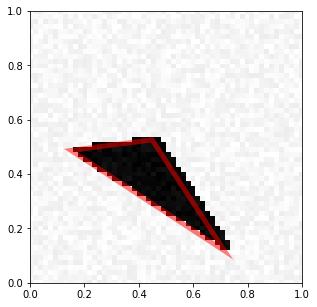

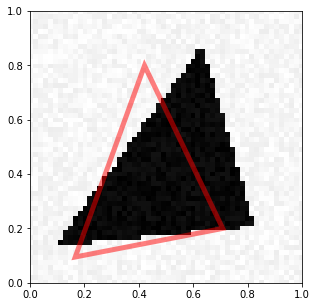

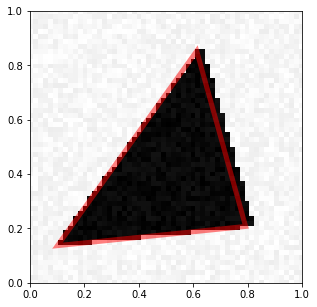

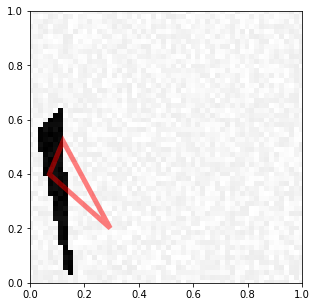

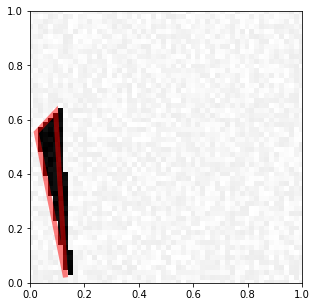

In [23]:
train_predictions = model_regression.predict(x_train)
for i in range(10):
    mp1.visualize_prediction(x_train[i], train_predictions[i])
    mp1.visualize_prediction(x_train[i], y_train[i])

Visualizing Prediction on Test Set

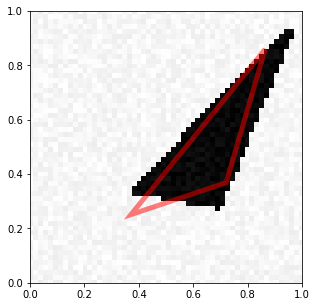

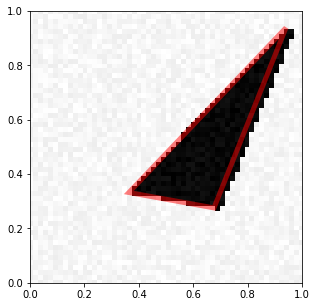

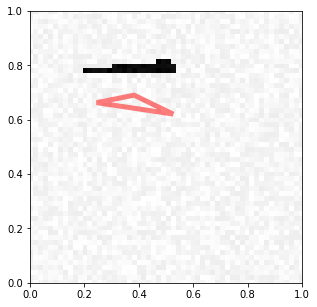

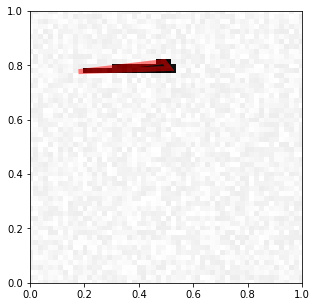

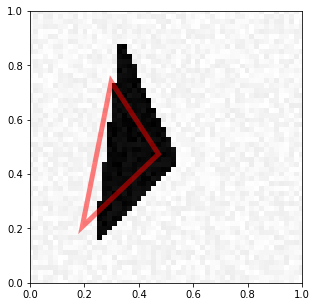

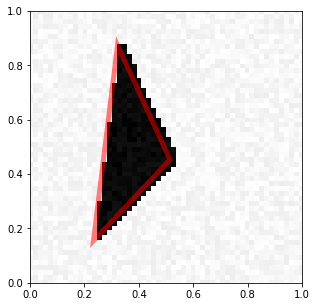

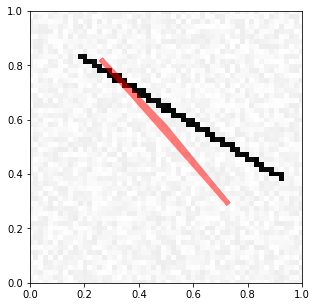

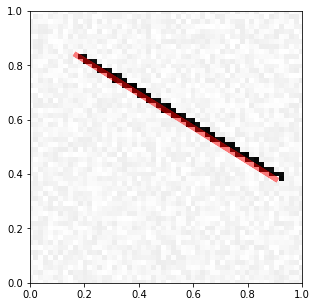

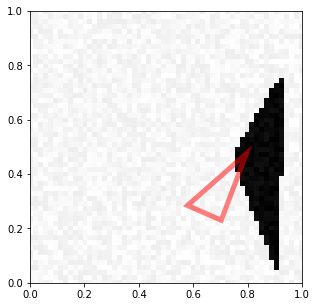

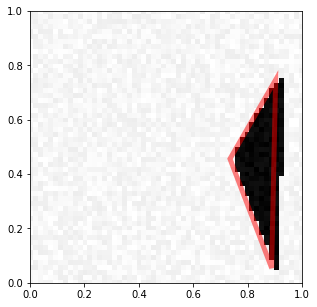

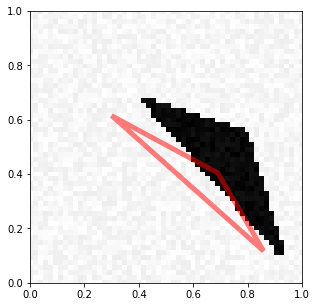

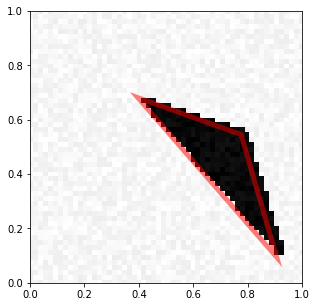

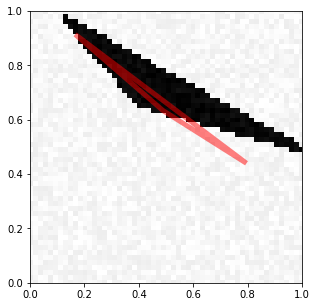

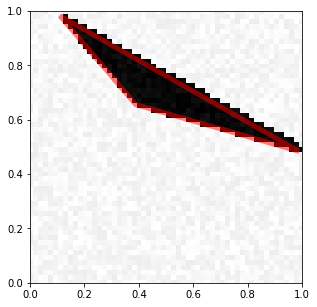

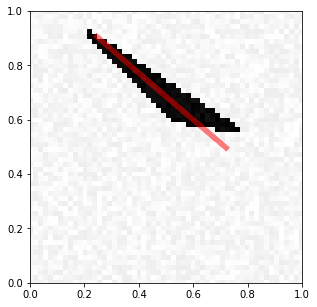

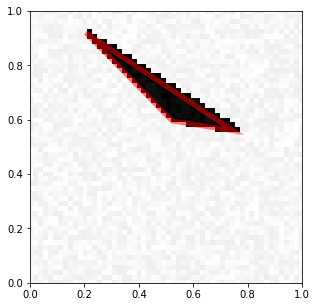

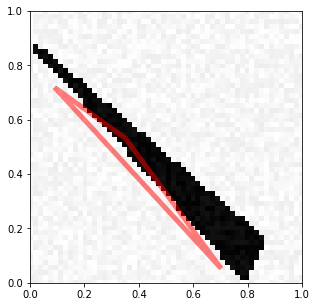

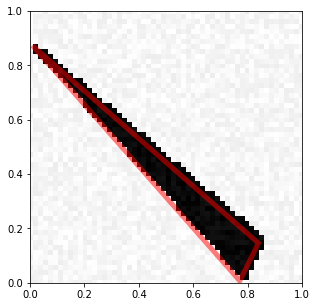

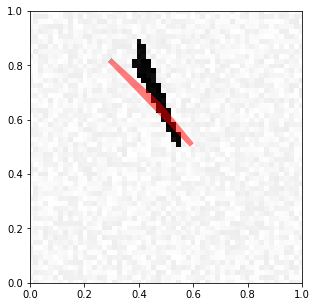

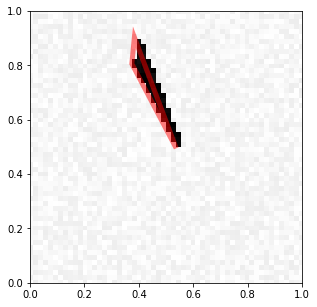

In [25]:
test_predictions = model_regression.predict(x_test)
for i in range(10):
    mp1.visualize_prediction(x_test[i], test_predictions[i])
    mp1.visualize_prediction(x_test[i], y_test[i])

# Image Denoising

Definition of the new functions to generate noised images

In [26]:
IMAGE_SIZE = mp1.IMAGE_SIZE
def generate_a_drawing_bis(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noised = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata_noised, imdata

def generate_a_rectangle_bis(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_bis(figsize, U, V, noise)


def generate_a_disk_bis(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_bis(figsize, U, V, noise)

def generate_a_triangle_bis(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata_noised, imdata = generate_a_drawing_bis(figsize, U, V, noise)
    return [imdata_noised, imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_classification_bis(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle_bis()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        noise_i = np.random.randint(255)

        category = np.random.randint(3)
        if category == 0:
            X[i], Y[i] = generate_a_rectangle_bis(noise, free_location)
        elif category == 1: 
            X[i], Y[i] = generate_a_disk_bis(noise, free_location)
        else:
            [X[i], Y[i], V] = generate_a_triangle_bis(noise, free_location)
        X[i] = (X[i] + noise) / (255 + 2 * noise)
        Y[i] = Y[i] / 255
    print('Data Created!')
    return [X, Y]

def generate_test_set_classification_bis():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification_bis(300, 20, True)
    return [X_test, Y_test]

Generating Training Set and Test Set

In [27]:
[X_train, Y_train] = generate_dataset_classification_bis(600, 50, True)
[X_test, Y_test] = generate_test_set_classification_bis()

Creating data:
Data Created!
Creating data:
Data Created!


Reshaping the different Data Sets

In [28]:
x_train = X_train.reshape((600, 72, 72, 1))
y_train = Y_train.reshape((600, 72, 72, 1))
x_test = X_test.reshape((300, 72, 72, 1))
y_test = Y_test.reshape((300, 72, 72, 1))

Visualizing of Training Set

<Figure size 720x720 with 0 Axes>

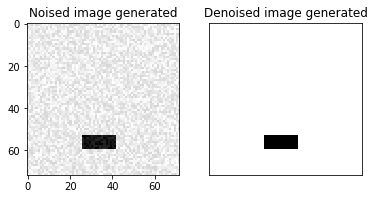

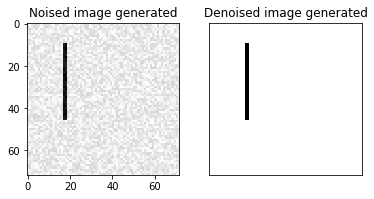

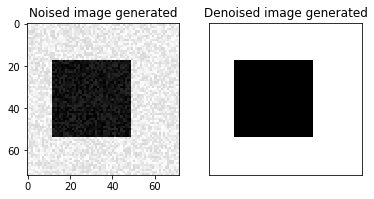

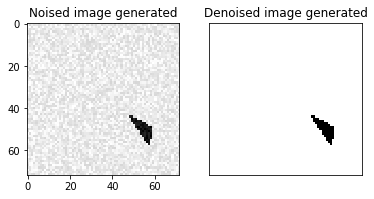

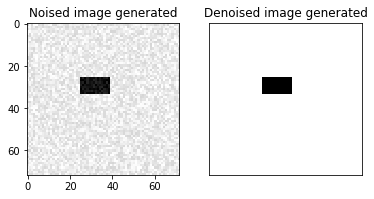

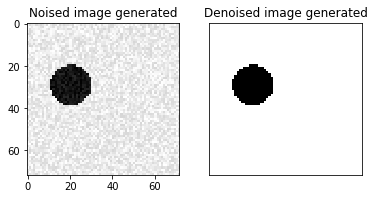

In [29]:
plt.figure(figsize=(10,10))
for i in range(6):
    f, ax = plt.subplots(1, 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ax[0].imshow(X_train[i].reshape(72,72), cmap= 'gray')
    ax[0].set_title('Noised image generated')
    ax[1].imshow(Y_train[i].reshape(72,72), cmap= 'gray')
    ax[1].set_title('Denoised image generated')

Implementation of the Denoising Model

In [30]:
model_denoising = Sequential()
model_denoising.add(Conv2D(32, kernel_size=(3,3),activation='linear',
                           input_shape=(72,72,1), padding='same'))

model_denoising.add(advanced_activations.LeakyReLU(alpha=0.1))
model_denoising.add(MaxPooling2D(pool_size=(2, 2)))
model_denoising.add(Conv2D(64, kernel_size=(3,3),activation='linear', padding='same'))
model_denoising.add(advanced_activations.LeakyReLU(alpha=0.1))
model_denoising.add(MaxPooling2D(pool_size=(2, 2)))
model_denoising.add(Conv2D(32, kernel_size=(3,3),activation='linear', padding='same'))
model_denoising.add(advanced_activations.LeakyReLU(alpha=0.1))
model_denoising.add(UpSampling2D(size=(2, 2)))
model_denoising.add(Conv2D(32, kernel_size=(3,3),activation='linear', padding='same'))
model_denoising.add(UpSampling2D(size=(2, 2)))
model_denoising.add(advanced_activations.LeakyReLU(alpha=0.1))
model_denoising.add(Conv2D(1, kernel_size=(3,3),activation='sigmoid', padding='same'))

model_denoising.compile(loss='mean_squared_error', optimizer = 'adam' ,metrics=['accuracy'])
model_denoising.fit(x_train, y_train, epochs= 32,
                    batch_size = 20, validation_split = 0.4)

Train on 360 samples, validate on 240 samples
Epoch 1/32
360/360 [==============================] - 85s 236ms/step - loss: 0.1148 - acc: 0.8663 - val_loss: 0.0771 - val_acc: 0.9185
Epoch 2/32
360/360 [==============================] - 90s 250ms/step - loss: 0.0684 - acc: 0.9115 - val_loss: 0.0362 - val_acc: 0.9640
Epoch 3/32
360/360 [==============================] - 98s 271ms/step - loss: 0.0148 - acc: 0.9849 - val_loss: 0.0069 - val_acc: 0.9907
Epoch 4/32
360/360 [==============================] - 87s 242ms/step - loss: 0.0060 - acc: 0.9923 - val_loss: 0.0055 - val_acc: 0.9930
Epoch 5/32
360/360 [==============================] - 87s 241ms/step - loss: 0.0054 - acc: 0.9931 - val_loss: 0.0052 - val_acc: 0.9932
Epoch 6/32
360/360 [==============================] - 91s 254ms/step - loss: 0.0049 - acc: 0.9937 - val_loss: 0.0050 - val_acc: 0.9937
Epoch 7/32
360/360 [==============================] - 88s 244ms/step - loss: 0.0052 - acc: 0.9932 - val_loss: 0.0053 - val_acc: 0.9929
Epoch 8/3

Visualizing of Predictions on Test Set

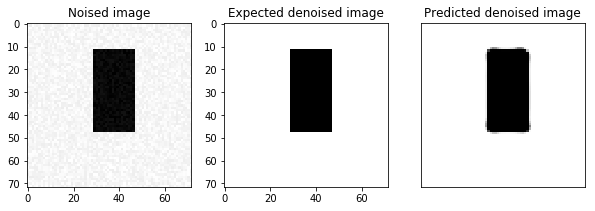

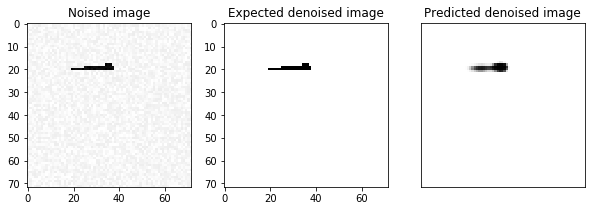

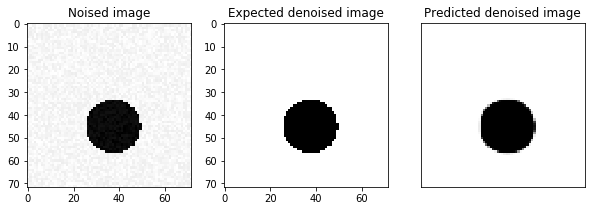

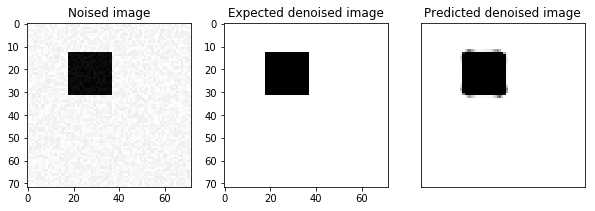

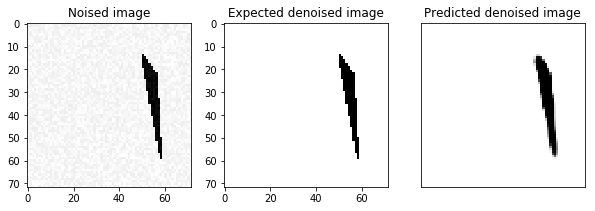

In [33]:
test_prediction = model_denoising.predict(x_test)
for i in range(5):
    f, ax = plt.subplots(1, 3, figsize=(10, 5))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ax[0].imshow(X_test[i].reshape(72,72), cmap= 'gray')
    ax[0].set_title('Noised image')  
    ax[1].imshow(Y_test[i].reshape(72,72), cmap= 'gray')
    ax[1].set_title('Expected denoised image')
    ax[2].imshow(test_prediction[i].reshape(72,72), cmap= 'gray')
    ax[2].set_title('Predicted denoised image')